In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

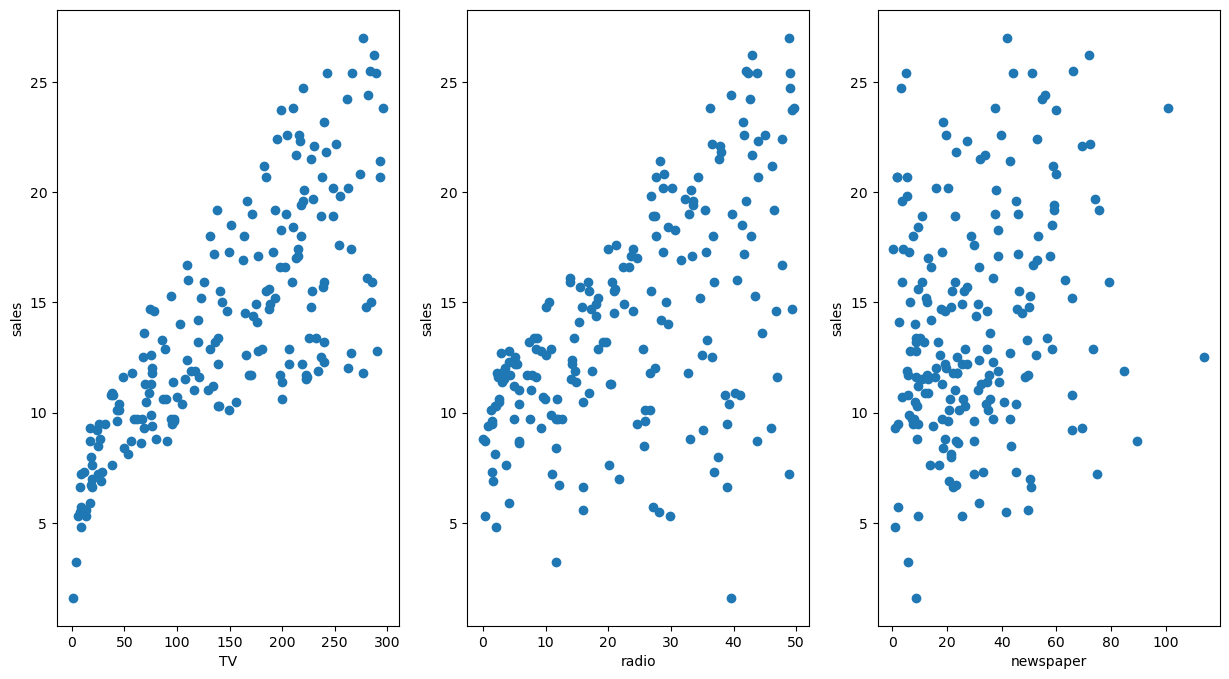

In [2]:
df=pd.read_csv('/Users/pranav/Desktop/Coding/Data-Science/DATA/Advertising.csv')

plt.figure(figsize=(15,8))
for i in range(len(df.columns[:-1])):
    plt.subplot(1,3,i+1)
    plt.xlabel(df.columns[i])
    plt.ylabel('sales')
    plt.scatter(df[df.columns[i]],df['sales'])


In [3]:
X=df.drop(columns='sales')
y=df['sales']

In [ ]:
df=pd.read_csv('/Users/pranav/Desktop/Coding/Data-Science/DATA/Advertising.csv')

remove_df=pd.DataFrame()
df_copy=df

X=df_copy.drop(columns='sales')
y=df_copy['sales']

lower_limits=[]
upper_limits=[]
for col in X.columns:
    q75=np.quantile(X[col],q=0.75)
    q25=np.quantile(X[col],q=0.25) 
    IQR=q75-q25
    upper_limits.append(q75+1.5*IQR)
    lower_limits.append(q25-1.5*IQR)

for i in range(len(X.columns)):
    col=X.columns[i]
    remove_df = pd.concat([remove_df, (df[(df[col] >= upper_limits[i]) | (df[col] <= lower_limits[i])])])

df.drop(index=remove_df.index,inplace=True)


<Axes: >

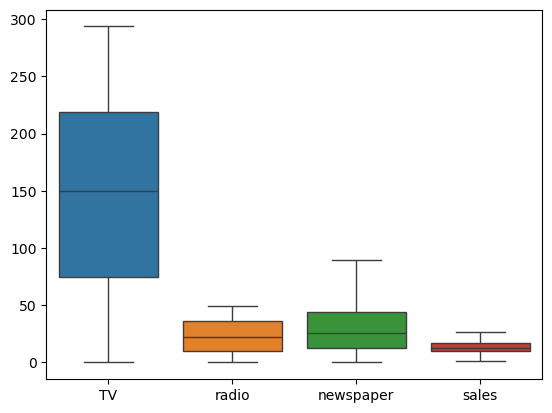

In [6]:
sns.boxplot(df)

In [7]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


<Axes: >

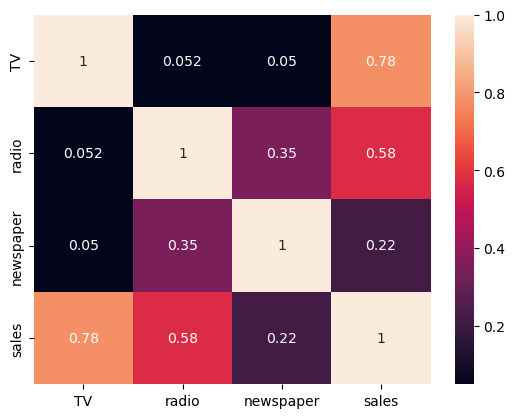

In [8]:
sns.heatmap(df.corr(),annot=True)

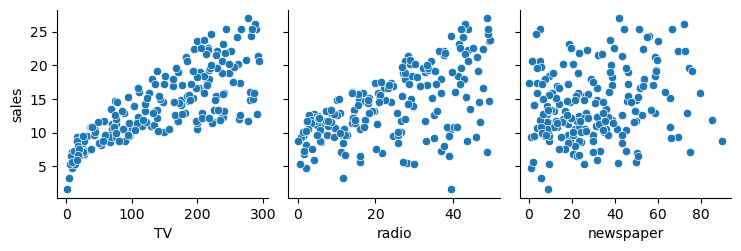

In [9]:
sns.pairplot(data=df,x_vars=['TV','radio','newspaper'],y_vars=['sales'],kind='scatter')

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import Ridge,Lasso,ElasticNet,RidgeCV,LassoCV,ElasticNetCV

Train R²: 0.9724942936018367
Test R²: 0.9796355313291649


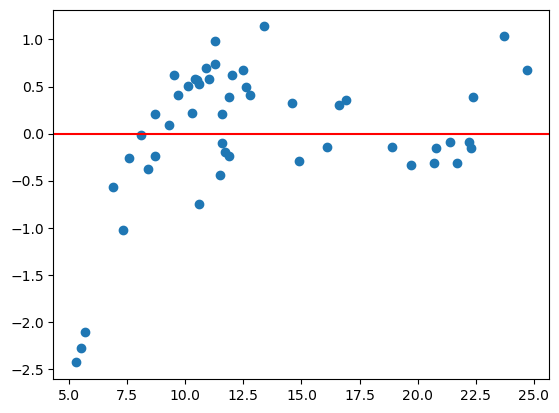

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

poly_converter=PolynomialFeatures(degree=3,include_bias=False)
X_train=poly_converter.fit_transform(X_train)
X_test=poly_converter.transform(X_test)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

model=ElasticNetCV(alphas=[0.1,0.8,0.5,0.9,1],l1_ratio=[0.1,0.2,0.5,0.9,1])
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
residual=y_test-y_pred

plt.scatter(y_test,residual)
plt.axhline(0,color='red')

print("Train R²:", model.score(X_train, y_train))
print("Test R²:", model.score(X_test, y_test))
